In [1]:
# Netflix Data visualization project:
# steps:
# load data: read csv file using pandas
# clean data: remove duplicates , missing values
# understand data
# identify questions to answer
# visualize data
# save the plots

In [2]:
# import libraries:
import pandas as pd
import matplotlib.pyplot as plt

# load the data:
df = pd.read_csv('netflix_titles.csv') 

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


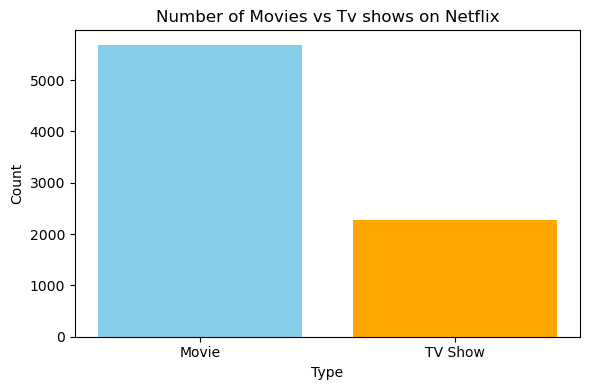

In [3]:
# clean data: 

df = df.dropna(subset = ['type','release_year','rating','country','duration'])

type_counts = df['type'].value_counts()

plt.figure(figsize = (6,4))
plt.bar(type_counts.index, type_counts.values, color = ['skyblue', 'orange'])
plt.title('Number of Movies vs Tv shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('movies_vs_tvshows.png')
plt.show()

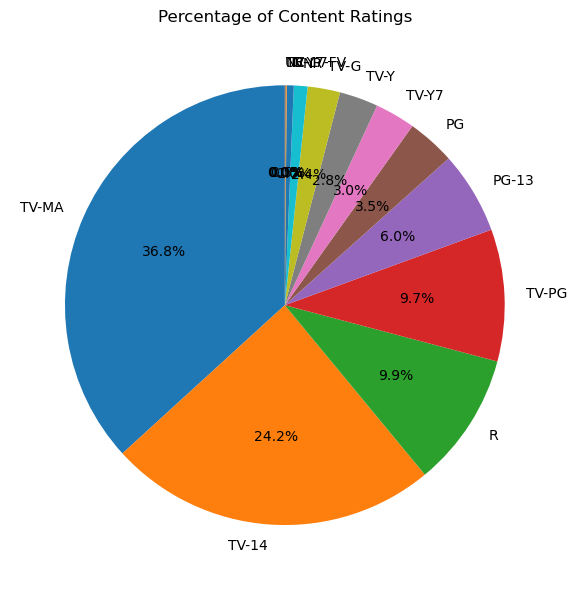

In [4]:
# percentage distribution of content ratings:

rating_counts = df['rating'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Content Ratings')
plt.tight_layout()
plt.savefig('content_Ratings_pie.png')
plt.show()

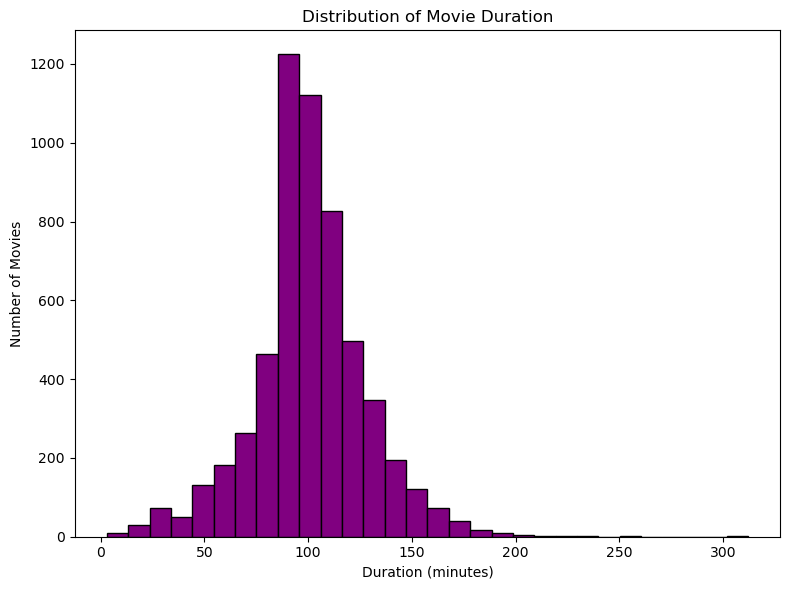

In [5]:
# Filter only Movies
movie_df = df[df['type'] == 'Movie'].copy()

# Extract numeric duration (remove 'min' and convert to int)
movie_df['duration_int'] = movie_df['duration'].str.replace('min', '').str.strip().astype(int)

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(movie_df['duration_int'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.savefig('movies_duration_histogram.png')
plt.show()

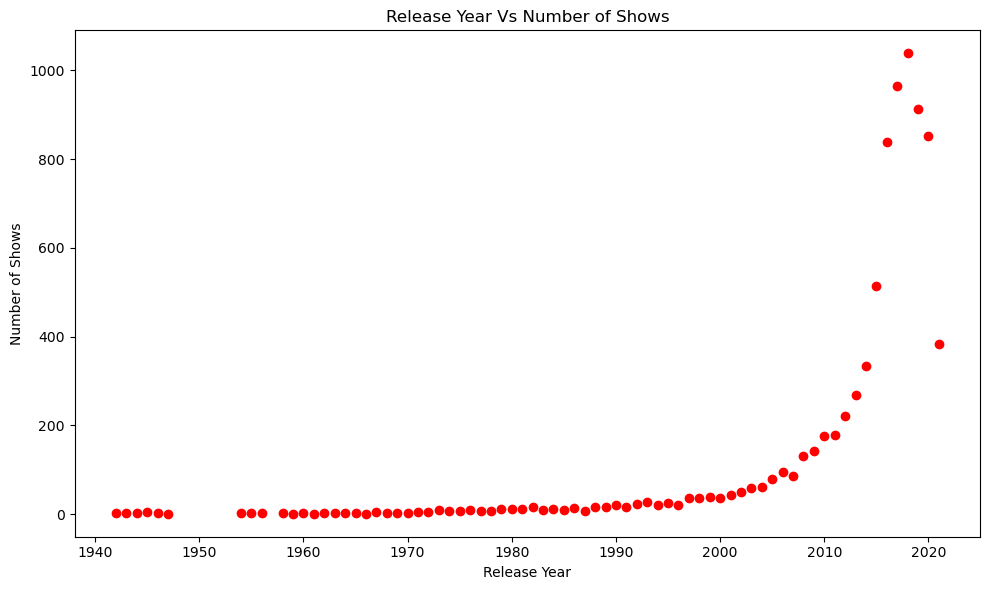

In [6]:
# Release year vs No of shows:

release_counts =  df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_counts.index, release_counts.values, color = 'red')
plt.title('Release Year Vs Number of Shows')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.tight_layout()
plt.savefig('Release_Year_Scat.png')
plt.show()

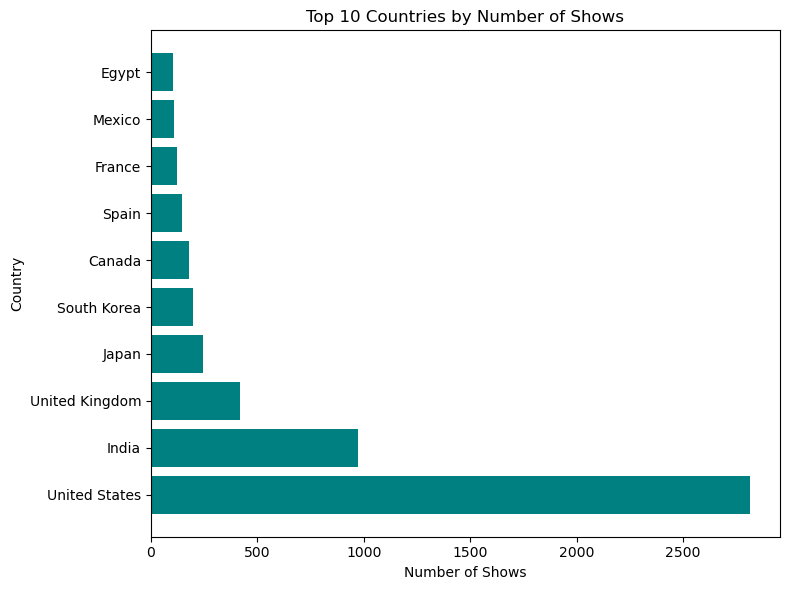

In [7]:
# Top 10 Countries by Number of Shows:

country_counts =  df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_counts.index, country_counts.values, color = 'teal')
plt.title('Top 10 Countries by Number of Shows')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('Top_10_Countries.png')
plt.show()

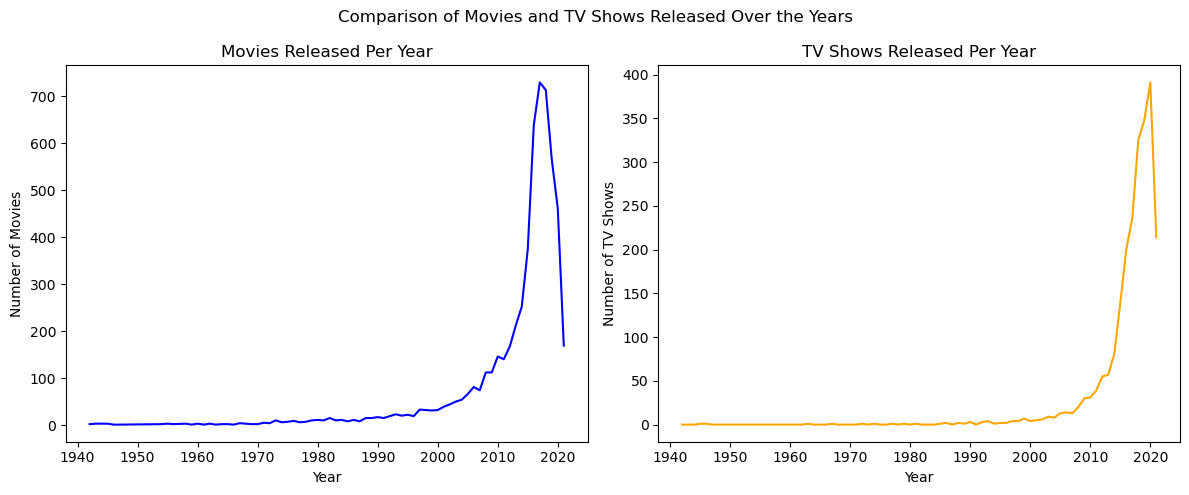

In [8]:
# Grouping the data by release year and type, then unstacking for separate columns
content_by_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)

# Creating two subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# ----- First Subplot: Movies -----
ax[0].plot(content_by_year.index, content_by_year['Movie'], color='blue')
ax[0].set_title('Movies Released Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')

# ----- Second Subplot: TV Shows -----
ax[1].plot(content_by_year.index, content_by_year['TV Show'], color='orange')
ax[1].set_title('TV Shows Released Per Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of TV Shows')

# Common title for both plots
fig.suptitle('Comparison of Movies and TV Shows Released Over the Years')

plt.tight_layout()
plt.savefig('movies_tv_shows_comparision.png')
plt.show()